In [2]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=fc15d59bec7ff3865776333aec70524e058b1eddfd8aae52900881b55af9191f
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [10]:
import numpy as np
import pandas as pd
import apyori as apriori
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Order1.csv")

In [12]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [14]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [15]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [18]:
len(df['itemDescription'].unique())

167

In [20]:
x = df['itemDescription']==None
print(x.value_counts())

False    38765
Name: itemDescription, dtype: int64


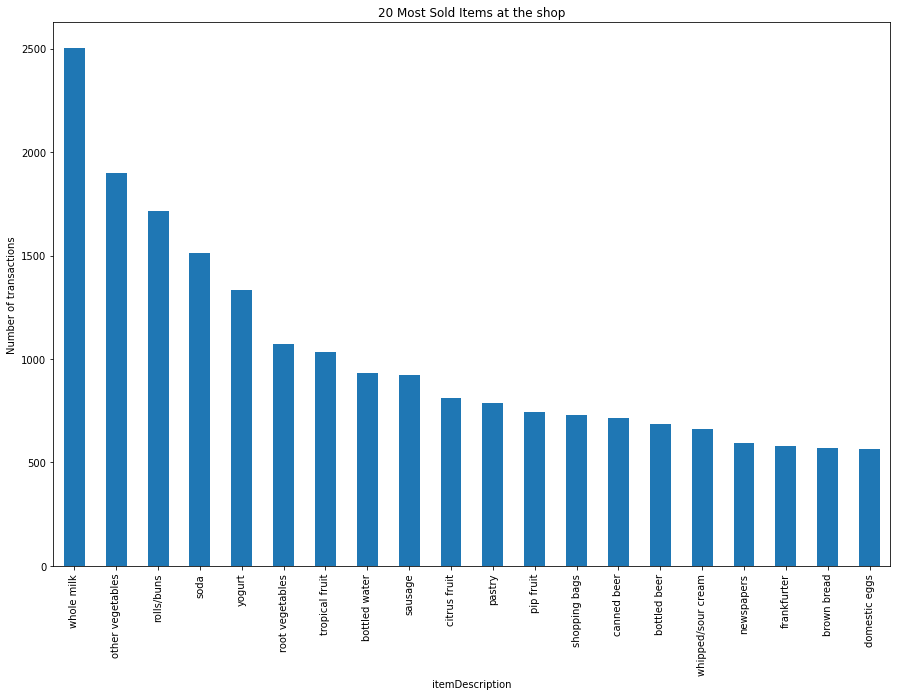

In [31]:
plt.figure(figsize=(15,10))
df['itemDescription'].value_counts().sort_values(ascending=False).head(20).plot.bar()
plt.xlabel('itemDescription')
plt.ylabel('Number of transactions')
plt.title('20 Most Sold Items at the shop')
plt.show()

In [32]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [42]:
new_df = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0)

In [43]:
new_df.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [49]:
def encode(x):
  if(x>=1):
    return 1
  else: return 0

new_df = new_df.applymap(encode)

In [52]:
from mlxtend.frequent_patterns import apriori
freq_items = apriori(new_df,min_support=0.01,use_colnames=True)

In [53]:
freq_items

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
...,...,...
3011,0.011031,"(yogurt, whipped/sour cream, soda, whole milk)"
3012,0.010518,"(bottled water, other vegetables, whole milk, ..."
3013,0.013597,"(other vegetables, sausage, whole milk, yogurt..."
3014,0.010005,"(shopping bags, other vegetables, whole milk, ..."


In [54]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules[['antecedents','consequents','support','confidence','lift']].head(5)

,antecedents,consequents,support,confidence,lift
7020,"(domestic eggs, meat)",(whole milk),0.010262,0.784314,1.711789
5708,"(fruit/vegetable juice, chocolate)",(whole milk),0.010775,0.750000,1.636898
15142,"(yogurt, rolls/buns, other vegetables, bottled...",(whole milk),0.010518,0.745455,1.626978
11630,"(yogurt, bottled water, pip fruit)",(whole milk),0.010262,0.740741,1.616689
11994,"(yogurt, rolls/buns, brown bread)",(whole milk),0.012827,0.735294,1.604802
